# Regularized Linear Regression Project Tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
#importing the CSV here
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [5]:
print(list(df.columns))

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

In [69]:
#check if duplicate 
df.duplicated().sum()

0

## Study Variables Select

- ICU Beds_x
- Total nurse practitioners (2019)
- Total physician assistants (2019)
- Total Hospitals (2019)


<function matplotlib.pyplot.show(close=None, block=None)>

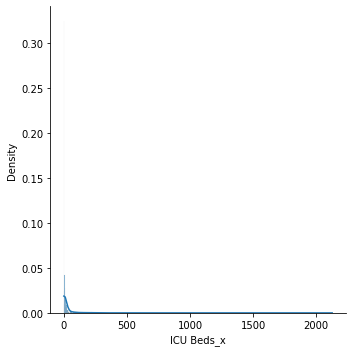

In [11]:
sns.displot(data=df, x="ICU Beds_x", kde=True, stat="density")
plt.show

In [4]:
df['ICU Beds_x'].value_counts()

0      1664
6       152
4       126
8       104
10       81
       ... 
471       1
117       1
118       1
279       1
381       1
Name: ICU Beds_x, Length: 239, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

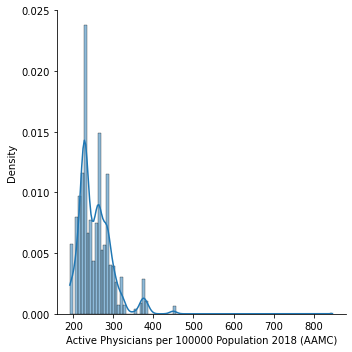

In [12]:
sns.displot(data=df, x="Active Physicians per 100000 Population 2018 (AAMC)", kde=True, stat="density")
plt.show

In [34]:
describe = df.describe()
#cuidados intensivos
describe[['ICU Beds_x','Total nurse practitioners (2019)','Total physician assistants (2019)','Total Hospitals (2019)']]

,ICU Beds_x,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019)
count,3140.000000,3140.000000,3140.000000,3140.000000
mean,23.817516,52.698009,28.215940,1.655299
std,84.602028,153.878850,86.409281,4.293436
min,0.000000,0.025524,0.009726,0.001363
25%,0.000000,5.439135,2.475921,0.248797
50%,0.000000,13.076544,5.969606,0.524404
75%,12.000000,35.215580,18.598497,1.311585
max,2126.000000,3937.767709,2022.531916,91.712638


### Outliers

Text(0, 0.5, 'ICU Beds_x')

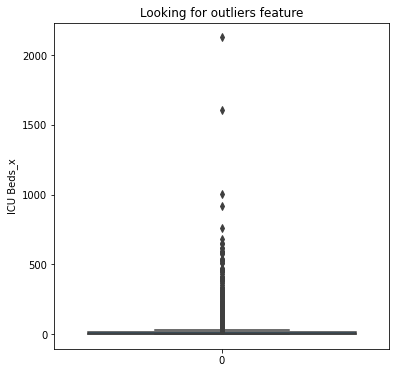

In [14]:
#Let's evaluate our 'ICU Beds_x' variable.
plt.figure(figsize=(6,6))
sns.boxplot(data=df['ICU Beds_x'])
plt.title('Looking for outliers feature')
plt.ylabel('ICU Beds_x')

See tha have two contry than have 1500. The rest have lest than 1000 ICU

In [22]:
df[df["ICU Beds_x"]>800][['fips','TOT_POP','ICU Beds_x','Total Hospitals (2019)']]

,fips,TOT_POP,ICU Beds_x,Total Hospitals (2019)
101,4013,4410824,1004,51.048029
202,6037,10105518,2126,91.712638
608,17031,5180493,1606,76.033758
2621,48201,4698619,918,85.617414


Text(0, 0.5, 'Total nurse practitioners (2019)')

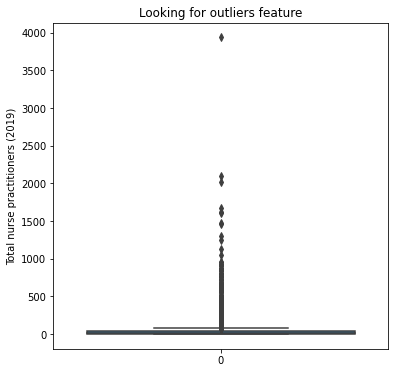

In [15]:
#Let's evaluate our 'ICU Beds_x' variable.
plt.figure(figsize=(6,6))
sns.boxplot(data=df['Total nurse practitioners (2019)'])
plt.title('Looking for outliers feature')
plt.ylabel('Total nurse practitioners (2019)')

In [23]:
df[df["Total nurse practitioners (2019)"]>2000][['fips','TOT_POP','ICU Beds_x','Total Hospitals (2019)','Total nurse practitioners (2019)']]

,fips,TOT_POP,ICU Beds_x,Total Hospitals (2019),Total nurse practitioners (2019)
101,4013,4410824,1004,51.048029,2092.969183
202,6037,10105518,2126,91.712638,3937.767709
608,17031,5180493,1606,76.033758,2017.944064


See that the outliers is the some contry than in beds. 

In [26]:
#see the data sort by population top 10
df.sort_values(by=['TOT_POP'] , ascending=False)[['fips','TOT_POP','ICU Beds_x','Total Hospitals (2019)','Total nurse practitioners (2019)']].head(10)

,fips,TOT_POP,ICU Beds_x,Total Hospitals (2019),Total nurse practitioners (2019)
202,6037,10105518,2126,91.712638,3937.767709
608,17031,5180493,1606,76.033758,2017.944064
2621,48201,4698619,918,85.617414,1620.673796
101,4013,4410824,1004,51.048029,2092.969183
220,6073,3343364,570,30.342703,1302.792276
213,6059,3185968,651,28.914256,1241.460548
360,12086,2761581,593,28.135308,1602.545675
2577,48113,2637772,614,48.065020,909.834988
1849,36047,2582830,318,21.939678,1666.754722
216,6065,2450758,351,22.241857,954.974868


Text(0, 0.5, 'Total Hospitals (2019)')

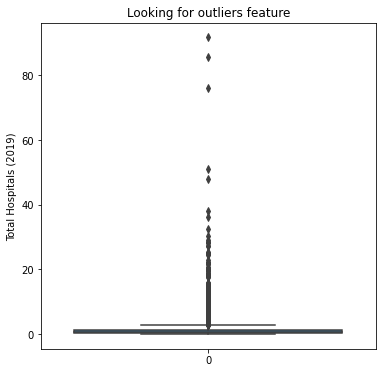

In [27]:
#Let's evaluate our 'Total Hospitals (2019)' variable.
plt.figure(figsize=(6,6))
sns.boxplot(data=df['Total Hospitals (2019)'])
plt.title('Looking for outliers feature')
plt.ylabel('Total Hospitals (2019)')

In [28]:
df[df["Total Hospitals (2019)"]>40][['fips','TOT_POP','ICU Beds_x','Total Hospitals (2019)','Total nurse practitioners (2019)']]

,fips,TOT_POP,ICU Beds_x,Total Hospitals (2019),Total nurse practitioners (2019)
101,4013,4410824,1004,51.048029,2092.969183
202,6037,10105518,2126,91.712638,3937.767709
608,17031,5180493,1606,76.033758,2017.944064
2577,48113,2637772,614,48.065020,909.834988
2621,48201,4698619,918,85.617414,1620.673796


<AxesSubplot:xlabel='TOT_POP', ylabel='Total nurse practitioners (2019)'>

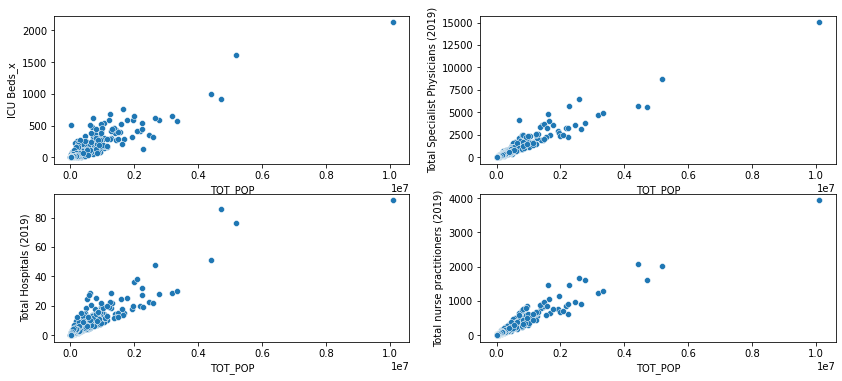

In [33]:
plt.figure(figsize=(14,6))

plt.subplot(2,2,1)
sns.scatterplot(data=df, x='TOT_POP', y='ICU Beds_x')

plt.subplot(2,2,2)
sns.scatterplot(data=df, x='TOT_POP', y='Total Specialist Physicians (2019)')

plt.subplot(2,2,3)
sns.scatterplot(data=df, x='TOT_POP', y='Total Hospitals (2019)')

plt.subplot(2,2,4)
sns.scatterplot(data=df, x='TOT_POP', y='Total nurse practitioners (2019)')

visualize that have relation and not outliders

### Correlation

In [34]:
df_corr = df.corr()
df_corr

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
fips,1.000000,-0.056079,-0.049580,-0.010586,-0.053130,0.018994,-0.053591,-0.030310,-0.051715,-0.045491,...,-0.063463,-0.031057,-0.036327,-0.026483,-0.056055,-0.040631,-0.044576,-0.033649,-0.062322,-0.008345
TOT_POP,-0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,...,0.981495,-0.174843,-0.160621,-0.187362,0.989583,-0.218731,-0.202895,-0.230914,0.993889,-0.428608
0-9,-0.049580,0.994010,1.000000,0.085920,0.997487,0.048341,0.989992,0.161984,0.990971,0.304263,...,0.972641,-0.167495,-0.152687,-0.180585,0.984664,-0.216430,-0.200512,-0.229570,0.985337,-0.423641
0-9 y/o % of total pop,-0.010586,0.052507,0.085920,1.000000,0.074714,0.687844,0.056047,0.130136,0.058535,0.342930,...,0.034582,-0.028295,-0.005923,-0.048949,0.047539,-0.133841,-0.117138,-0.153847,0.040384,-0.050916
19-Oct,-0.053130,0.994596,0.997487,0.074714,1.000000,0.056762,0.988552,0.167605,0.987298,0.294682,...,0.973427,-0.178421,-0.163623,-0.191449,0.982778,-0.226956,-0.210885,-0.239865,0.985221,-0.431290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CKD_prevalence,-0.040631,-0.218731,-0.216430,-0.133841,-0.226956,-0.276999,-0.219593,-0.366835,-0.215739,-0.478115,...,-0.191943,0.918514,0.908023,0.925347,-0.175064,1.000000,0.995203,0.995594,-0.183045,0.471775
CKD_Lower 95% CI,-0.044576,-0.202895,-0.200512,-0.117138,-0.210885,-0.259547,-0.203506,-0.341480,-0.199999,-0.450913,...,-0.176039,0.924630,0.917499,0.928512,-0.159501,0.995203,1.000000,0.989756,-0.167424,0.454327
CKD_Upper 95% CI,-0.033649,-0.230914,-0.229570,-0.153847,-0.239865,-0.296576,-0.232199,-0.393541,-0.228048,-0.506720,...,-0.204368,0.906711,0.892914,0.916610,-0.187528,0.995594,0.989756,1.000000,-0.195052,0.489551
CKD_number,-0.062322,0.993889,0.985337,0.040384,0.985221,0.007654,0.986895,0.149367,0.985851,0.271343,...,0.991025,-0.144575,-0.131191,-0.156493,0.995536,-0.183045,-0.167424,-0.195052,1.000000,-0.416486


In [42]:
df_corrAbs = df_corr.abs()

df_corrAbs = df_corrAbs.unstack()
df_corrAbsBest = df_corrAbs.sort_values(kind="quicksort", ascending=False)
df_corrAbsBest.head(5)



fips                   fips                     1.0
R_NET_MIG_2018         R_NET_MIG_2018           1.0
Two or more races pop  Two or more races pop    1.0
% Two or more races    % Two or more races      1.0
POP_ESTIMATE_2018      TOT_POP                  1.0
dtype: float64

In [58]:
feature=['ICU Beds_x','Total nurse practitioners (2019)','Total physician assistants (2019)','Total Hospitals (2019)']

def corr_feature(feature):
  for index, value in df_corrAbsBest.items():
    # do some staff
    if (((index[0] == feature) or (index[1] == feature )) and index[0]!=index[1] ) :
      if value > 0.7:
        print( index[0], index[1], value)

In [60]:
corr_feature('ICU Beds_x')

COPD_number ICU Beds_x 0.9227396740830274
ICU Beds_x COPD_number 0.9227396740830274
anycondition_number ICU Beds_x 0.9187523481498423
ICU Beds_x anycondition_number 0.9187523481498423
Obesity_number ICU Beds_x 0.9180867133843899
ICU Beds_x Obesity_number 0.9180867133843899
ICU Beds_x Heart disease_number 0.9177573688039996
Heart disease_number ICU Beds_x 0.9177573688039996
ICU Beds_x CKD_number 0.9150831331373849
CKD_number ICU Beds_x 0.9150831331373849
20-29 ICU Beds_x 0.9139785994964985
ICU Beds_x 20-29 0.9139785994964985
ICU Beds_x 60-69 0.9129042968121343
60-69 ICU Beds_x 0.9129042968121343
Family Medicine/General Practice Primary Care (2019) ICU Beds_x 0.9126525763175694
ICU Beds_x Family Medicine/General Practice Primary Care (2019) 0.9126525763175694
county_pop2018_18 and older ICU Beds_x 0.912557514016606
ICU Beds_x county_pop2018_18 and older 0.912557514016606
ICU Beds_x Total Population 0.9113629221029198
Total Population ICU Beds_x 0.9113629221029198
ICU Beds_x TOT_POP 0.910

In [61]:
corr_feature('Total nurse practitioners (2019)')

Total Specialist Physicians (2019) Total nurse practitioners (2019) 0.9764741593559745
Total nurse practitioners (2019) Total Specialist Physicians (2019) 0.9764741593559745
Total nurse practitioners (2019) Population Aged 60+ 0.9705959426126277
Population Aged 60+ Total nurse practitioners (2019) 0.9705959426126277
60-69 Total nurse practitioners (2019) 0.9703477036571964
Total nurse practitioners (2019) 60-69 0.9703477036571964
Total nurse practitioners (2019) 50-59 0.9688904085942234
50-59 Total nurse practitioners (2019) 0.9688904085942234
Total nurse practitioners (2019) Internal Medicine Primary Care (2019) 0.967784602930925
Internal Medicine Primary Care (2019) Total nurse practitioners (2019) 0.967784602930925
county_pop2018_18 and older Total nurse practitioners (2019) 0.9663426235314713
Total nurse practitioners (2019) county_pop2018_18 and older 0.9663426235314713
Total nurse practitioners (2019) Employed_2018 0.9653081369534613
Employed_2018 Total nurse practitioners (2019)

In [62]:
corr_feature('Total physician assistants (2019)')

Total nurse practitioners (2019) Total physician assistants (2019) 0.9648398772211385
Total physician assistants (2019) Total nurse practitioners (2019) 0.9648398772211385
Total Specialist Physicians (2019) Total physician assistants (2019) 0.9638106751504052
Total physician assistants (2019) Total Specialist Physicians (2019) 0.9638106751504052
Total physician assistants (2019) Internal Medicine Primary Care (2019) 0.9526866795770873
Internal Medicine Primary Care (2019) Total physician assistants (2019) 0.9526866795770873
60-69 Total physician assistants (2019) 0.9467568942035525
Total physician assistants (2019) 60-69 0.9467568942035525
Population Aged 60+ Total physician assistants (2019) 0.9459190070774764
Total physician assistants (2019) Population Aged 60+ 0.9459190070774764
Total physician assistants (2019) 50-59 0.9446487919163163
50-59 Total physician assistants (2019) 0.9446487919163163
Total physician assistants (2019) county_pop2018_18 and older 0.9437158408998012
county_

view that Total nurse practitioners (2019) and Total physician assistants (2019) hight correlation

In [63]:
corr_feature('Total Hospitals (2019)')

Obesity_number Total Hospitals (2019) 0.9423957320553368
Total Hospitals (2019) Obesity_number 0.9423957320553368
Total Hospitals (2019) 0-9 0.9374986391465295
0-9 Total Hospitals (2019) 0.9374986391465295
Total Hospitals (2019) anycondition_number 0.9342827233389451
anycondition_number Total Hospitals (2019) 0.9342827233389451
Family Medicine/General Practice Primary Care (2019) Total Hospitals (2019) 0.9332949428652432
Total Hospitals (2019) Family Medicine/General Practice Primary Care (2019) 0.9332949428652432
19-Oct Total Hospitals (2019) 0.9330096087763099
Total Hospitals (2019) 19-Oct 0.9330096087763099
TOT_POP Total Hospitals (2019) 0.9250326876351878
Total Hospitals (2019) TOT_POP 0.9250326876351878
POP_ESTIMATE_2018 Total Hospitals (2019) 0.9250326876351878
Total Hospitals (2019) POP_ESTIMATE_2018 0.9250326876351878
Employed_2018 Total Hospitals (2019) 0.9247411165251237
Total Hospitals (2019) Employed_2018 0.9247411165251237
Civilian_labor_force_2018 Total Hospitals (2019) 0

# Model

In [107]:
import pandas as pd 

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [100]:
#create the relation fips code, and county 
names_df = df[['fips', 'COUNTY_NAME', 'STATE_NAME']]

In [101]:
#select targettargets
 = df[['ICU Beds_x','Total Specialist Physicians (2019)']] 

In [102]:
pd.options.display.max_rows = 200
df.dtypes
#remove all data about infraestructre of hospitals or humans resource
df_data = df.copy()
df_data.drop(['CNTY_FIPS','fips','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)','Active General Surgeons per 100000 Population 2018 (AAMC)','Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)','Total physician assistants (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','STATE_NAME','COUNTY_NAME','ICU Beds_x','Total Specialist Physicians (2019)'], axis=1, inplace=True)

In [104]:
X = df_data
y1 = targets['ICU Beds_x']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=42)

In [108]:
#Using a pipeline to dynamically standardize the data that goes into our model
 
pipeline1 = make_pipeline(StandardScaler(), Lasso(alpha=2))
pipeline1.fit(X_train, y_train)
print(pipeline1[1].coef_, pipeline1[1].intercept_)

[ 0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.          0.
 -0.1439942   0.         -0.          0.         -0.          0.
  0.          0.         -0.         14.16331327  0.          0.
 -0.          0.         -0.         -0.         -0.          0.
  0.          0.         -0.         16.41315767  0.3703261   0.
  0.         -0.         -0.         -0.          0.          0.
  0.         13.9258527  -0.         -0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.66991273  0.          0.          0.         -0.         -0.
 -0.          0.          0.         -0.         -0.          0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         44.27209948 -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.        ] 24.63011828

In [109]:
coef_list=pipeline1[1].coef_

In [110]:
#select only the coef dif of cero
loc=[i for i, e in enumerate(coef_list) if e != 0]

In [111]:
 col_name=df_data.columns

In [112]:
col_name[loc]

Index(['50-59 y/o % of total pop', 'Black-alone pop', 'GQ_ESTIMATES_2018',
       'R_birth_2018', 'Bachelor's degree or higher 2014-18', 'CI90UBINC_2018',
       'COPD_number'],
      dtype='object')